# Natural Language Processing (NLP)

NLP is a subfield of AI which enable computers to understand and process human language. The main task of NLP would be to program computers for analyzing and processing huge amount of natural language data

In [4]:
# install NLTK (Natural Language Tool Kit) for analysis text language in english.
# The Natural language toolkit (NLTK) is a collection of Python libraries designed especially 
# for identifying and tag parts of speech found in the text of natural language like English
!pip install nltk

!pip install pandas

Data from kaggle (https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset). The data contain csv files of true and fake news

**What is SpaCy**

spaCy is a library for advanced Natural Language Processing in Python and Cython. It's built on the very latest research, and was designed from day one to be used in real products.

spaCy comes with pretrained pipelines and currently supports tokenization and training for 60+ languages. It features state-of-the-art speed and neural network models for tagging, parsing, named entity recognition, text classification and more, multi-task learning with pretrained transformers like BERT, as well as a production-ready training system and easy model packaging, deployment and workflow management. spaCy is commercial open-source software, released under the MIT license.

In [1]:
# Install SpaCy

!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

You should consider upgrading via the 'C:\Users\nuril\anaconda3\envs\pycaret_venv\python.exe -m pip install --upgrade pip' command.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires spacy<2.4.0, but you have spacy 3.5.2 which is incompatible.
en-core-web-sm 2.3.1 requires spacy<2.4.0,>=2.3.0, but you have spacy 3.5.2 which is incompatible.
You should consider upgrading via the 'C:\Users\nuril\anaconda3\envs\pycaret_venv\python.exe -m pip install --upgrade pip' command.


  Using cached spacy-3.5.2-cp36-cp36m-win_amd64.whl (13.1 MB)
  Using cached thinc-8.1.10-cp36-cp36m-win_amd64.whl (1.5 MB)
  Using cached pathy-0.10.1-py3-none-any.whl (48 kB)
  Using cached spacy_loggers-1.0.4-py3-none-any.whl (11 kB)
  Using cached typer-0.7.0-py3-none-any.whl (38 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached contextvars-2.4-py3-none-any.whl
  Using cached confection-0.0.4-py3-none-any.whl (32 kB)
  Using cached immutables-0.19-cp36-cp36m-win_amd64.whl (58 kB)
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.6
    Uninstalling thinc-7.4.6:
      Successfully uninstalled thinc-7.4.6
  Attempting uninstall: spacy
    Found existing installation: spacy 2.3.9
    Uninstalling spacy-2.3.9:
      Successfully uninstalled spacy-2.3.9

You should consider upgrading via the 'c:\Users\nuril\anaconda3\envs\pycaret_venv\python.exe -m pip install --upgrade pip' command.



  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.3.1
    Uninstalling en-core-web-sm-2.3.1:
      Successfully uninstalled en-core-web-sm-2.3.1
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [37]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

# import spacy
# nlp = spacy.load('en_core_web_sm')

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib import rcParams


In [38]:
df_true = pd.read_csv('Dataset\True.csv')
df_fake = pd.read_csv('Dataset\Fake.csv')

df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [39]:
# Make class column for true and fake dataset
df_true['class'] = 1
df_fake['class'] = 0

# Merge the dataset to become a single dataset
df = pd.concat([df_true, df_fake])

df[(df['class']==1)].head(10)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


In [40]:
df[(df['class']==0)].head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [42]:
# Make sample for 5000 dataset
df = df.sample(5000, random_state=42).reset_index(drop=True)
df.head(10)

,title,text,subject,date,class
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0
5,"As private lawyer, Trump high court pick was f...",WASHINGTON (Reuters) - As a lawyer in private ...,politicsNews,"February 1, 2017",1
6,Yemeni Salafist imam killed in Aden: sources,ADEN (Reuters) - A Salafist imam was shot dead...,worldnews,"October 28, 2017",1
7,FBI says witnesses in U.S. probe into Malaysia...,KUALA LUMPUR (Reuters) - Potential witnesses t...,worldnews,"September 6, 2017",1
8,An Easy To Read Chart Shows How Bernie Sanders...,The goal of socialism is communism. -Vladimi...,politics,"Feb 24, 2016",0
9,MMA FIGHTER JAKE SHIELDS Embarrasses Cowards I...,Opposing views and beliefs has much of this co...,politics,"Feb 4, 2017",0


In [43]:
df = df.drop(['date'], axis=1)

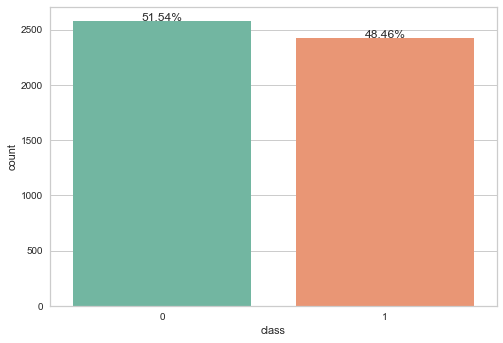

In [44]:
ax = sns.countplot(x=df['class'], data=df, palette="Set2")

# Make percentage
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 4, '{0:.2f}%'.format(height / total * 100), ha='center')

plt.show()

Observation = Data look balanced

## NLP Text Classification using PyCaret

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially and makes you more productive.

Complete Documentation : http://www.pycaret.org/tutorials/html/NLP101.html

In [45]:
# !pip install pycaret==2.3.10

`setup()` function initializes the environment in pycaret and performs several text pre-processing steps that are imperative to work with NLP problems. setup must be called before executing any other function in pycaret. It takes two parameters: pandas dataframe and name of the text column passed as target parameter. You can also pass a list containing text, in which case you don't need to pass target parameter. When setup is executed, following pre-processing steps are applied automatically:

- Removing Numeric Characters: All numeric characters are removed from the text. They are replaced with blanks.

- Removing Special Characters: All non-alphanumeric special characters are removed from the text. They are also replaced with blanks.

- Word Tokenization: Word tokenization is the process of splitting a large sample of text into words. This is the core requirement in natural language processing tasks where each word needs to be captured separately for further analysis.

- Stopword Removal: A stop word (or stopword) is a word that is often removed from text because it is common and provides little value for information retrieval, even though it might be linguistically meaningful. Example of such words in english language are: "the", "a", "an", "in" etc.

- Bigram Extraction: A bigram is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words. For example: word New York is captured as two different words "New" and "York" when tokenization is performed but if it is repeated enough times, Bigram Extraction will represent the word as one i.e. "New_York".

- Trigram Extraction: Similar to bigram extraction, trigram is a sequence of three adjacent elements from a string of tokens.

- Lemmatizing: Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single word, identified by the word's lemma, or dictionary form. In English language, word appears in several inflected forms. For example the verb 'to walk' may appear as 'walk', 'walked', 'walks', 'walking'. The base form, 'walk', that one might look up in a dictionary, is called the lemma for the word.

- Custom Stopwords: Many times text contains words that are not stopwords by the rule of language but they add no or very little information. For example, in this tutorial we are using the loan dataset. As such, words like "loan", "bank", "money", "business" are too obvious and adds no value. More often than not, they also add a lot of noise in the topic model. You can remove those words from corpus by using `custom_stopwords` parameter.

In [46]:
from pycaret.nlp import *

fake_news_nlp = setup(data = df, target='text')

Description,Value
session_id,4239
Documents,5000
Vocab Size,28345
Custom Stopwords,False


INFO:logs:setup() succesfully completed......................................


- **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment session_id is set as 123 for later reproducibility.

- **Documents** : Number of documents (or samples in dataset if dataframe is passed).

- **Vocab Size** : Size of vocabulary in the corpus after applying all text pre-processing such as removal of stopwords, bigram/trigram extraction, lemmatization etc.

Notice that all text pre-processing steps are performed automatically when you execute setup(). These steps are imperative to perform any NLP experiment. setup() function prepares the corpus and dictionary that is ready-to-use for the topic models that you can create using create_model() function. Another way to pass the text is in the form of list.

**The Next step is create a Topic Model**

In statistics and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently: "dog" and "bone" will appear more often in documents about dogs, "cat" and "meow" will appear in documents about cats, and "the" and "is" will appear approximately equally in both. A document typically concerns multiple topics in different proportions; thus, in a document that is 10% about cats and 90% about dogs, there would probably be about 9 times more dog words than cat words. The "topics" produced by topic modeling techniques are clusters of similar words. A topic model captures this intuition in a mathematical framework, which allows examining a set of documents and discovering, based on the statistics of the words in each, what the topics might be and what each document's balance of topics is. (Wikipedia)

Creating a topic model in PyCaret is simple and similar to how you would have created a model in supervised modules of pycaret. A topic model is created using `create_model()` function which takes one mandatory parameter i.e. name of model as a string. This function returns a trained model object. There are 5 topic models available in PyCaret. see the docstring of `create_model()` for complete list of models.

**LDA**

<img src="Assets/LDA.jpg" alt="LDA" />

In natural language processing, the latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics. LDA is an example of a topic model.

In [47]:
lda = create_model('lda', multi_core=True)

INFO:logs:LdaModel(num_terms=28345, num_topics=4, decay=0.5, chunksize=100)
INFO:logs:create_model() succesfully completed......................................


In [48]:
print(lda)

LdaModel(num_terms=28345, num_topics=4, decay=0.5, chunksize=100)


We have created Latent Dirichlet Allocation (LDA) model with just one word i.e. `create_model()`. Notice the `num_topics` parameter is set to 4 which is a default value taken when you do not pass `num_topics` parameter in `create_model()`. In below example, we will create LDA model with 6 topics and we will also set `multi_core` parameter to `True`. When multi_core is set to True Latent Dirichlet Allocation (LDA) uses all CPU cores to parallelize and speed up model training.

In [49]:
lda_results = assign_model(lda)

INFO:logs:(5000, 10)
INFO:logs:assign_model() succesfully completed......................................


In [50]:
lda_results.head()

,title,text,subject,class,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,white_house chaos try cover problem mount hour...,News,0,0.388489,0.002113,0.032834,0.576564,Topic 3,0.58
1,Failed GOP Candidates Remembered In Hilarious...,presumptive nominee time remember candidate tr...,News,0,0.001370,0.001372,0.001340,0.995918,Topic 3,1.00
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,mike_pence huge homophobe support ex conversio...,News,0,0.001570,0.134726,0.001581,0.862124,Topic 3,0.86
3,California AG pledges to defend birth control ...,say prepare take action take defend obamacare ...,politicsNews,1,0.008543,0.226187,0.701745,0.063525,Topic 2,0.70
4,AZ RANCHERS Living On US-Mexico Border Destroy...,twist reasoning come pelosi day especially pro...,politics,0,0.115531,0.005046,0.223783,0.655640,Topic 3,0.66


In [51]:
plot_model(lda)

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=28345, num_topics=4, decay=0.5, chunksize=100), plot=frequency, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: frequency
INFO:logs:Rendering Visual
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=28345, num_topics=4, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(5000, 10)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting CountVectorizer()


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [52]:
plot_model(lda, plot = 'topic_distribution')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=28345, num_topics=4, decay=0.5, chunksize=100), plot=topic_distribution, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: topic_distribution
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=28345, num_topics=4, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(5000, 10)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Sorting Dataframe
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


**Observation** : Documents related to Topic 3 are the most. Keywords related to Topic 0 include : trump, say, people, go, get, make, woman, know, time, take.

In [55]:
# plot_model(lda, 'wordcloud')

In [56]:
plot_model(plot = 'bigram')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=None, plot=bigram, topic_num=None, save=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: bigram
INFO:logs:Fitting CountVectorizer()
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [57]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 0')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=28345, num_topics=4, decay=0.5, chunksize=100), plot=frequency, topic_num=Topic 0, save=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: frequency
INFO:logs:Rendering Visual
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=28345, num_topics=4, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(5000, 10)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting CountVectorizer()


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


**T-distributed Stochastic Neighbor Embedding (t-SNE)**

T-distributed Stochastic Neighbor Embedding (t-SNE) is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions.

In [58]:
plot_model(lda, plot = 'tsne')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=28345, num_topics=4, decay=0.5, chunksize=100), plot=tsne, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: tsne
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=28345, num_topics=4, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(5000, 10)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting TSNE()
INFO:logs:Sorting Dataframe
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


**Uniform Manifold Approximation and Projection Plot**

UMAP (Uniform Manifold Approximation and Projection) is a novel manifold learning technique for dimensionality reduction. It is similar to tSNE and PCA in its purpose as all of them are techniques to reduce dimensionality for 2d/3d projections. UMAP is constructed from a theoretical framework based in Riemannian geometry and algebraic topology.

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=28345, num_topics=4, decay=0.5, chunksize=100), plot=umap, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: umap
INFO:logs:Fitting TfidfVectorizer()
INFO:logs:Fitting KMeans()
INFO:logs:Fitting UMAP()
INFO:logs:Rendering Visual


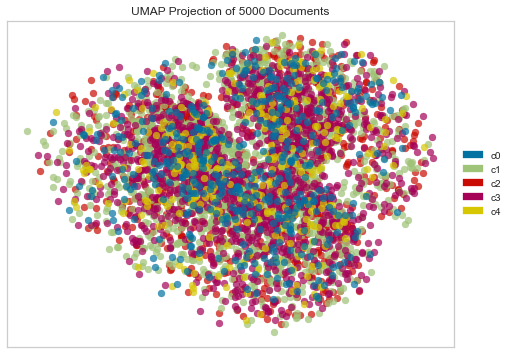

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [59]:
plot_model(lda, plot = 'umap')

Another way to analyze performance of models is to use `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function

In [60]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [61]:
from pycaret.classification import *

setup(data = lda_results, target = 'class', silent=True)

,Description,Value
0,session_id,3084
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5000, 10)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

(False,
 False,
 Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False),
 5,
 3725    0
 320     0
 4467    0
 4747    0
 1594    0
        ..
 4622    0
 500     0
 1143    1
 1808    1
 2022    0
 Name: class, Length: 3499, dtype: int64,
 None,
 [],
 'box-cox',
 None,
        Topic_0   Topic_1   Topic_2   Topic_3  Perc_Dominant_Topic  \
 0     0.388489  0.002113  0.032834  0.576564                 0.58   
 1     0.001370  0.001372  0.001340  0.995918                 1.00   
 2     0.001570  0.134726  0.001581  0.862124                 0.86   
 3     0.008543  0.226187  0.701745  0.063525                 0.70   
 4     0.115531  0.005046  0.223783  0.655640                 0.66   
 ...        ...       ...       ...       ...                  ...   
 4995  0.007690  0.976784  0.007757  0.007770                 0.98   
 4996  0.017374  0.946159  0.017953  0.018514                 0.95   
 4997  0.091117  0.589933  0.294789  0.024161                 0.59   
 4998  0

In [62]:
compare_models(sort='Accuracy',n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8710
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.7430
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1440
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0940
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1280
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2570
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5600
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6870
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0120
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7330


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3084, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), GaussianNB(priors=None, var_smoothing=1e-09), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weig

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=3084, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform'),
 GaussianNB(priors=None, var_smoothing=1e-09),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=3084, splitter='best'